Importamos las librerias que vamos a utilizar


In [47]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enzoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importamos cada dataframe y lo guardamos en una variable con sus nombres

In [48]:
df_coursera_courses = pd.read_csv("Coursera_courses.csv")
df_coursera_reviews = pd.read_csv("Coursera_reviews.csv")
df_edx_courses = pd.read_csv("edx_courses.csv")
df_udemy_courses = pd.read_csv("udemy_courses.csv")

Revisamos lo que contiene

In [49]:
df_coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


Pasamos todo a minusculas

In [50]:
df_coursera_courses = df_coursera_courses.apply(lambda x: x.str.lower())

Revisamos los cambios

In [51]:
df_coursera_courses.head()

,name,institution,course_url,course_id
0,machine learning,stanford university,https://www.coursera.org/learn/machine-learning,machine-learning
1,indigenous canada,university of alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,the science of well-being,yale university,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,technical support fundamentals,google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,become a cbrs certified professional installer...,google - spectrum sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


Revisamos la existencia de nulos y duplicados

In [52]:
df_coursera_courses.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [53]:
df_coursera_courses.duplicated().sum()

0

Realizamos el WordCloud

In [54]:
stopwords1=stopwords.words("english")
titles = df_coursera_courses["name"].tolist()
fdist = FreqDist (titles)

Calcula la frecuencia de aparición de cada palabra

In [55]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords1,
                colormap = 'viridis',
                min_font_size = 10).generate_from_frequencies(fdist)

Visualizamos el WordCloud

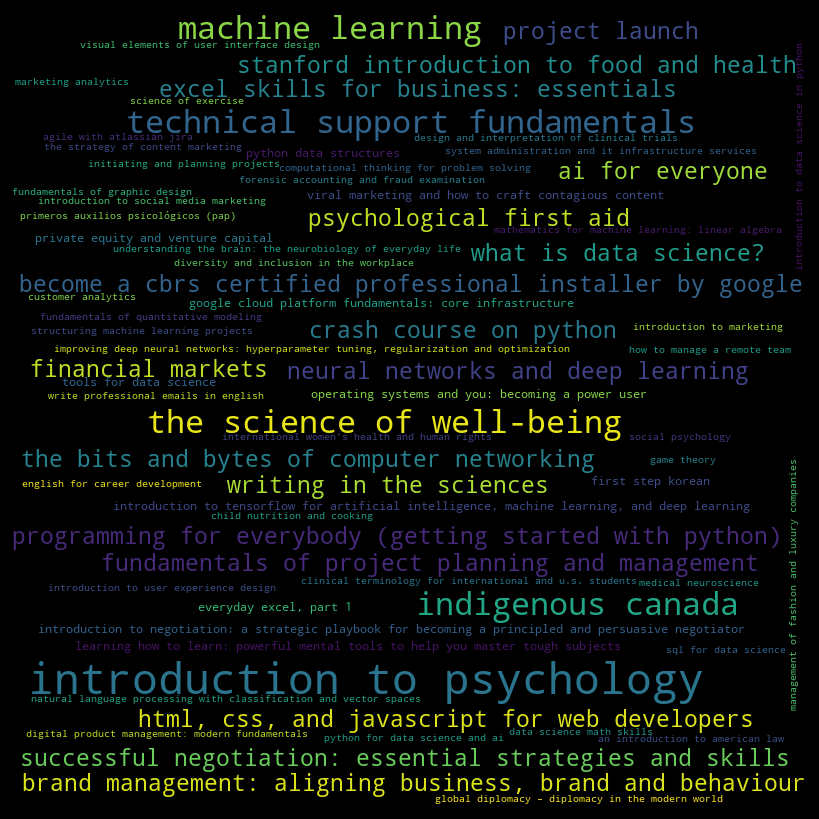

In [56]:
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Eliminamos las columnas que no tienen relevancia

In [57]:
df_coursera_courses.drop("course_url",axis=1, inplace=True)

Visualizamos el DataFrame de Coursera_reviews

In [58]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Revisamos existencia de nulos y duplicados

In [59]:
df_coursera_reviews.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [60]:
df_coursera_reviews.duplicated().sum()

934764

Eliminamos solamente los valores duplicados

In [61]:
df_coursera_reviews.drop_duplicates(inplace=True)

Pasamos las mayusculas a minusculas y convertimos los valores a str

In [62]:
df_coursera_reviews['reviewers'] = df_coursera_reviews['reviewers'].apply(lambda x: x.lower())
df_coursera_reviews['reviews'] = df_coursera_reviews['reviews'].astype(str).apply(lambda x: x.lower())

Revisamos los cambios

In [63]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"pretty dry, but i was able to pass with just t...",by robert s,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,by gabriel e r,"Sep 28, 2020",4,google-cbrs-cpi-training
2,information was perfect! the program itself wa...,by jacob d,"Apr 08, 2020",4,google-cbrs-cpi-training
3,a few grammatical mistakes on test made me do ...,by dale b,"Feb 24, 2020",4,google-cbrs-cpi-training
4,excellent course and the training provided was...,by sean g,"Jun 18, 2020",4,google-cbrs-cpi-training


Realizamos el WordCloud

In [64]:
stopwords3=stopwords.words("english")
titles = df_coursera_reviews["reviews"].tolist()
fdist = FreqDist (titles)

In [65]:
# Calcula la frecuencia de aparición de cada palabra
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords3,
                colormap = 'viridis',
                min_font_size = 10).generate_from_frequencies(fdist)

Visualizamos el WordCloud

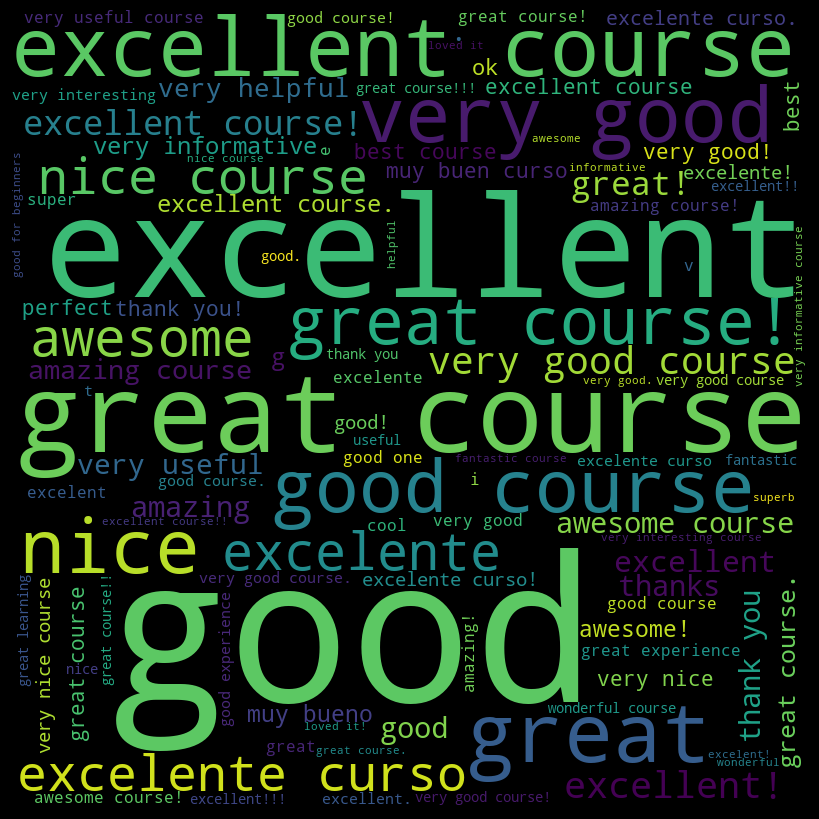

In [66]:
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Eliminamos las columnas que no tienen relevancia

In [67]:
df_coursera_reviews.drop(["reviews","reviewers"],axis=1, inplace=True)

Revisamos lo que contiene

In [68]:
df_edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


Pasamos las Mayusculas a minuscula

In [69]:
df_edx_courses = df_edx_courses.apply(lambda x: x.str.lower())

Realizamos el WordCloud

In [70]:
stopwords3 = stopwords.words('english')

In [71]:
titles = df_edx_courses['title'].tolist()

In [72]:
fdist = FreqDist(titles)

In [73]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords3,
                colormap = 'viridis',
                min_font_size = 10).generate_from_frequencies(fdist)

Visualiza el WordCloud

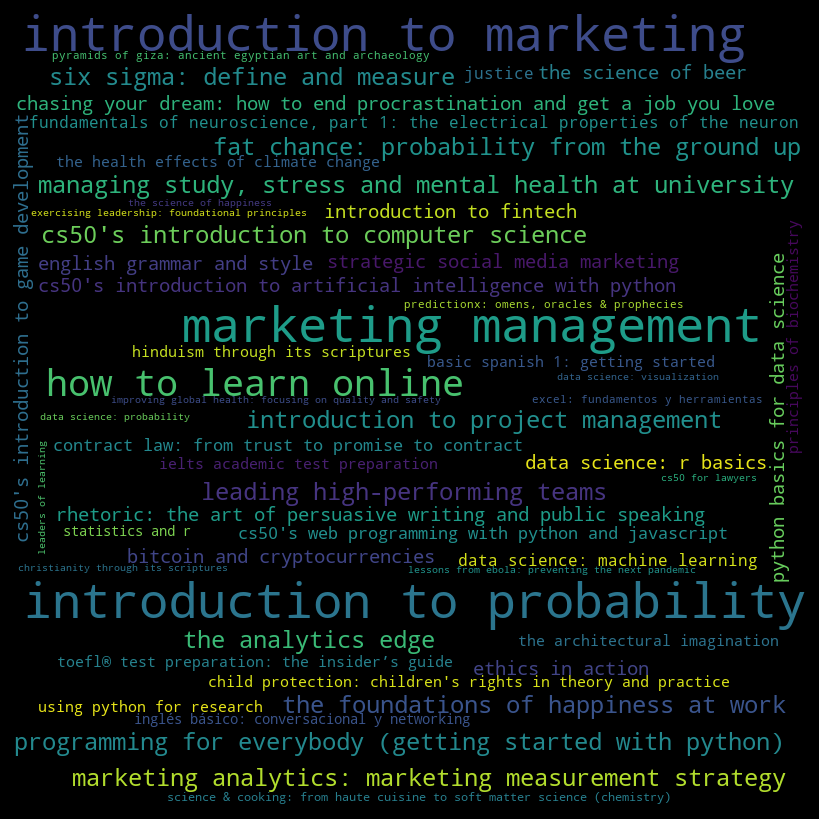

In [74]:
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Eliminamos las columnas que no tienen relevancia

In [75]:
df_edx_courses.drop(["summary","institution","instructors","subtitles", "course_effort","course_length","course_description","course_syllabus","course_url"],axis=1,inplace=True)

Revisamos lo que contiene

In [76]:
df_udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Cambiamos las mayusculas a minusculas y hacemos los cambios para que sea todo str

In [77]:
df_udemy_courses['course_title'] = df_udemy_courses['course_title'].str.replace(',','').str.replace('.','').str.replace('-','')


C:\Users\enzoc\AppData\Local\Temp\ipykernel_8168\1437018340.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_udemy_courses['course_title'] = df_udemy_courses['course_title'].str.replace(',','').str.replace('.','').str.replace('-','')


In [78]:
df_udemy_courses['course_title'] = df_udemy_courses['course_title'].apply(lambda x: x.lower())

In [79]:
df_udemy_courses['level'] = df_udemy_courses['level'].apply(lambda x: x.lower())
df_udemy_courses['subject'] = df_udemy_courses['subject'].apply(lambda x: x.lower())

Revisamos si tiene nulos o duplicados

In [80]:
df_udemy_courses.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [81]:
df_udemy_courses.duplicated().sum()

6

Eliminamos los duplicados

In [82]:
df_udemy_courses.drop_duplicates(inplace=True)

Revisamos los cambios

In [83]:
df_udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,ultimate investment banking course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,all levels,1.5,2017-01-18T20:58:58Z,business finance
1,1113822,complete gst course & certification grow your...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,all levels,39.0,2017-03-09T16:34:20Z,business finance
2,1006314,financial modeling for business analysts and c...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,intermediate level,2.5,2016-12-19T19:26:30Z,business finance
3,1210588,beginner to pro financial analysis in excel 2017,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,all levels,3.0,2017-05-30T20:07:24Z,business finance
4,1011058,how to maximize your profits trading options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,intermediate level,2.0,2016-12-13T14:57:18Z,business finance


Reemplazamos true y false por pagó y no pagó

In [84]:
df_udemy_courses.is_paid=df_udemy_courses.is_paid.replace(True,"Pago").replace(False,"No Pago")

In [85]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   object 
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 372.9+ KB


Realizamos el WordCloud

In [86]:
stopwords4=stopwords.words("english")

In [87]:
titles = df_udemy_courses["course_title"].tolist()

In [88]:
fdist = FreqDist (titles)

In [89]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                      stopwords=stopwords4,
                      max_words=50,
                      max_font_size=40,
                      scale=5,
                      random_state=2,
                min_font_size = 10).generate_from_frequencies(fdist)

Visualiza el WordCloud

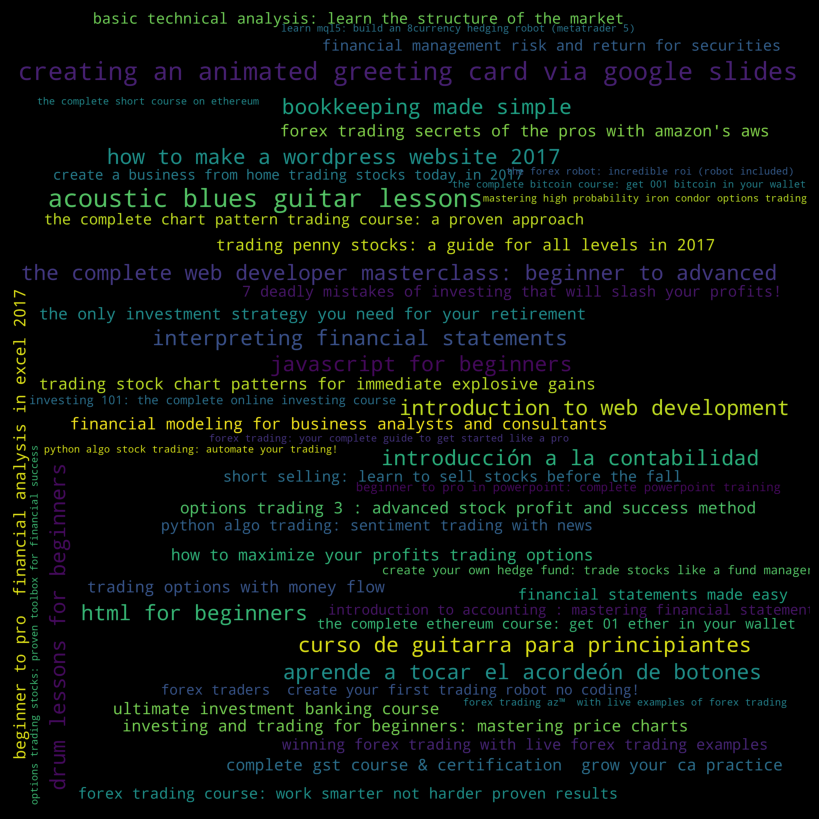

In [90]:
plt.figure(figsize = (8, 8), facecolor = "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Eliminamos las columnas que no tienen relevancia

In [91]:
df_udemy_courses.drop(["course_id","url"],axis=1, inplace=True)

Guardamos los cambios en otros csv para llevarlos a powerbi

In [92]:
df_coursera_courses.to_csv("coursera_coursescle.csv",index=False)
df_coursera_reviews.to_csv("coursera_reviewscle.csv",index=False)
df_edx_courses.to_csv("edx_coursescle.csv",index=False)
df_udemy_courses.to_csv("udemy_coursescle.csv",index=False)